**Learning Vector Quantization(LVQ) Algorithm**

Step 0: Initialize the reference vectors. From the given set of training vectors, take the first n vectors (the number of clusters for training vectors) and use them as weight vectors and the remaining vectors for training.

Step 1: Calculate the Euclidean distance of each training sample to each weight vector using the Euclidean distance formula:

```
  D(j) = ∑ i=1 to n (Wij-Xi)²
```


Step 2: Evaluate the winning Unit index J , for which D(j) is Maximum.

Step 3: Update the weight in the winning unit using:

       * if T=J
         Wnew = Wold+ɳ*(Xi-Wold)
       * if T≠J
         Wnew = Wold-ɳ*(Xi-Wold)

In [41]:
import numpy as np
from itertools import product

In [42]:
labels = np.random.choice([1, 2], size=16, replace=True)
np.random.shuffle(labels)
print(labels)

[2 1 1 2 1 2 1 1 1 2 2 1 2 2 1 1]


In [43]:
combinations = list(product([0, 1], repeat=4))
combinations_array = np.array(combinations)
np.random.shuffle(combinations_array)
print(combinations_array)

[[1 0 1 1]
 [0 1 1 1]
 [1 0 0 0]
 [0 0 1 1]
 [1 1 1 0]
 [0 0 0 0]
 [1 0 1 0]
 [0 0 0 1]
 [0 0 1 0]
 [1 0 0 1]
 [1 1 0 0]
 [0 1 1 0]
 [0 1 0 0]
 [0 1 0 1]
 [1 1 0 1]
 [1 1 1 1]]


In [44]:
len(combinations_array)

16

In [45]:
learning_rate=0.1

In [46]:
def Euclidean_distance(array1, array2):
    return np.sum((array1 - array2) ** 2)

In [47]:
def winning(w1,w2,label1,label2,sample_data):
  distance1=Euclidean_distance(sample_data,w1)
  distance2=Euclidean_distance(sample_data,w2)
  if(distance1<distance2):
    j= label1
    return j,w1
  else:
    j=label2
    return j,w2

In [48]:
def LVQ(refrence_vectors, labels, epochs, learning_rate):
    W1 = refrence_vectors[0]
    label1 = labels[0]
    W2 = refrence_vectors[1]
    label2 = labels[1]
    misclassifications_per_epoch = []
    error_rate=[]

    for epoch in range(epochs):
        misclassified = 0
        for i in range(2, 16):
            w1 = W1
            w2 = W2
            sample_data = refrence_vectors[i]
            j, w = winning(w1, w2, label1, label2, sample_data)
            t = labels[i]
            if t == j:
                if w is W1:
                    W1 = W1 + learning_rate * (sample_data - w1)
                else:
                    W2 = W2 + learning_rate * (sample_data - w2)
            else:
                misclassified += 1
                if w is W1:
                    W1 = W1 - learning_rate * (sample_data - w1)
                else:
                    W2 = W2 - learning_rate * (sample_data - w2)
        misclassifications_per_epoch.append(misclassified)
        error=misclassified/len(refrence_vectors)
        error_rate.append(error)
    return W1, W2, misclassifications_per_epoch,error_rate

W1, W2, misclassifications_per_epoch,error_rate = LVQ(combinations_array , labels,30, learning_rate)
print("W1:", W1)
print("W2:", W2)
print("Misclassifications per epoch:", misclassifications_per_epoch)

W1: [ 1.48562829 -0.59053363  2.23418516  2.23180136]
W2: [1.10106565 0.48626757 1.6846115  0.13114122]
Misclassifications per epoch: [9, 9, 9, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]


In [49]:
print("Error for each epoch:")
for i in range(30):
  print(f"Epoch {i+1} : Error={error_rate[i]}")

Error for each epoch:
Epoch 1 : Error=0.5625
Epoch 2 : Error=0.5625
Epoch 3 : Error=0.5625
Epoch 4 : Error=0.5
Epoch 5 : Error=0.375
Epoch 6 : Error=0.375
Epoch 7 : Error=0.375
Epoch 8 : Error=0.375
Epoch 9 : Error=0.375
Epoch 10 : Error=0.375
Epoch 11 : Error=0.375
Epoch 12 : Error=0.375
Epoch 13 : Error=0.375
Epoch 14 : Error=0.375
Epoch 15 : Error=0.375
Epoch 16 : Error=0.375
Epoch 17 : Error=0.375
Epoch 18 : Error=0.375
Epoch 19 : Error=0.375
Epoch 20 : Error=0.375
Epoch 21 : Error=0.375
Epoch 22 : Error=0.375
Epoch 23 : Error=0.375
Epoch 24 : Error=0.375
Epoch 25 : Error=0.375
Epoch 26 : Error=0.375
Epoch 27 : Error=0.375
Epoch 28 : Error=0.375
Epoch 29 : Error=0.375
Epoch 30 : Error=0.375


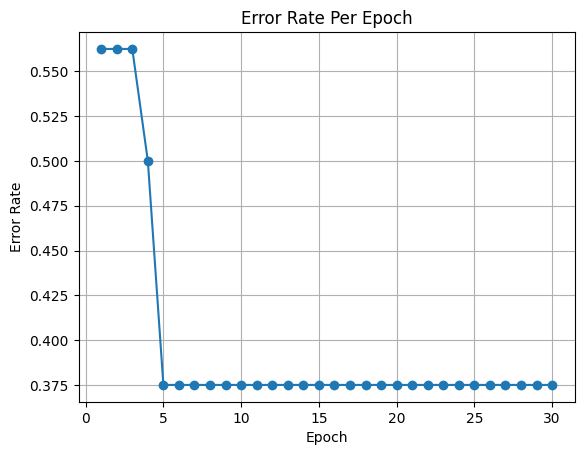

In [50]:
import matplotlib.pyplot as plt
plt.plot(range(1,31),error_rate,marker='o')
plt.title('Error Rate Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

**Conclusion**

In this program, we implemented the Learning Vector Quantization (LVQ) algorithm to classify data into predefined classes.
The LVQ algorithm involves several steps:

1. Initialization of Reference Vectors
2. Calculation of Euclidean Distance
3. Evaluation of Winning Unit
4. Updating the Weight in the Winning Unit

After implementing the LVQ algorithm, we observed the convergence of weights over epochs. The misclassifications per epoch decreased gradually, indicating the learning process of the algorithm. Additionally, we calculated the error rate for each epoch to assess the algorithm's performance.

Overall, the LVQ algorithm demonstrated its capability to classify data effectively based on predefined classes, making it a valuable tool for pattern recognition and classification tasks.
